###1) Curado de datos: Quitar todos los datos sin etiquetar.

In [ ]:
import tensorflow as tf
from urllib import request
import numpy as np
import matplotlib.pyplot as plt

example1_url="https://raw.githubusercontent.com/CSC-CONICET/CURSO-LEARNING1/main/datasets/prostata_label.csv"
f = request.urlopen(example1_url)
dataset1 = np.loadtxt(f, dtype=str, delimiter=",", skiprows=1)

example2_url="https://raw.githubusercontent.com/CSC-CONICET/CURSO-LEARNING1/main/datasets/prostata_data.csv"
f = request.urlopen(example2_url)
dataset2 = np.loadtxt(f, dtype=str, delimiter=",", skiprows=1)

def curar_datos(dataset):
  return dataset[:,1] != ''

labels_dataset = dataset1[curar_datos(dataset1)]
conc_dataset = dataset2[curar_datos(dataset1)]

x_train_str = conc_dataset[:,1:]
y_train_str = labels_dataset[:,1]

outputs = {
    "healthy": 0,
    "cancer": 1,
    "post-surgery": 2,
    "benign": 3
}

y_train = np.array([])
for cat in y_train_str:
  y_train = np.append(y_train, outputs[cat])

x_train = x_train_str.astype(np.float)
print(x_train)

[[1.82886662e+02 0.00000000e+00 1.20055143e+02 ... 7.83701850e+01
  1.19461428e+03 4.01409910e+02]
 [1.69431590e+02 4.54604059e+00 2.98457567e+02 ... 1.08763407e+02
  9.26947063e+02 5.44896122e+02]
 [3.31243786e+01 1.71714935e+03 1.71340081e+02 ... 2.73989941e+01
  5.10646098e+02 1.82016428e+02]
 ...
 [1.13639459e+02 1.42854613e+00 8.95608298e+01 ... 1.11931710e+02
  4.47587060e+02 5.50732215e+02]
 [1.00944997e+02 2.13602360e+02 5.33707854e+02 ... 1.57624910e+02
  6.30222369e+02 8.70856582e+02]
 [1.71543885e+01 2.05935544e+01 1.67400341e+02 ... 5.68453507e+01
  1.37337337e+02 3.58139031e+02]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


###2) Programar con keras el GD. Indicar el learning rate, el patience del early stopping, el riesgo empírico finalmente alcanzado y el correspondiente accuracy

In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(4, input_dim=762))
model.summary()

x_train_normalized = np.divide((np.subtract(x_train, x_train.mean(axis=0))), x_train.std(axis=0))

es = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=1)                             
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.04), loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=["accuracy"])
hist = model.fit(x=x_train_normalized, y=y_train, batch_size = 390, epochs=3000,callbacks=[es])

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 12ms/step - loss: 0.1418 - accuracy: 0.9846
Epoch 502/3000
1/1 [==============================] - 0s 13ms/step - loss: 0.1416 - accuracy: 0.9846
Epoch 503/3000
1/1 [==============================] - 0s 15ms/step - loss: 0.1414 - accuracy: 0.9846
Epoch 504/3000
1/1 [==============================] - 0s 10ms/step - loss: 0.1412 - accuracy: 0.9846
Epoch 505/3000
1/1 [==============================] - 0s 17ms/step - loss: 0.1410 - accuracy: 0.9846
Epoch 506/3000
1/1 [==============================] - 0s 17ms/step - loss: 0.1407 - accuracy: 0.9846
Epoch 507/3000
1/1 [==============================] - 0s 12ms/step - loss: 0.1405 - accuracy: 0.9846
Epoch 508/3000
1/1 [==============================] - 0s 11ms/step - loss: 0.1403 - accuracy: 0.9846
Epoch 509/3000
1/1 [==============================] - 0s 15ms/step - loss: 0.1401 - accuracy: 0.9872
Epoch 510/3000
1/1 [==============================] - 0

###3) Mostrar la confusion matrix.

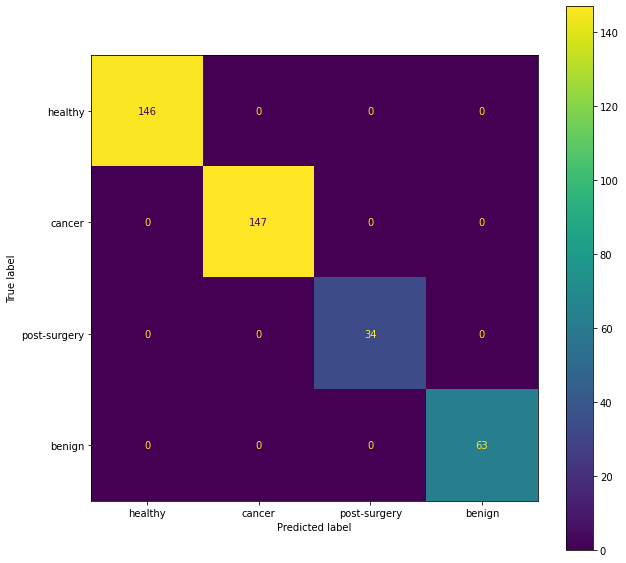

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

def clasificar_patologia(entrada):
  prediccion = model.predict(entrada)
  arg_max = np.argmax(prediccion, axis=1)
  return arg_max

y_test = clasificar_patologia(x_train_normalized)

# Plot confusion matrix
fig, ax = plt.subplots(1,1,figsize=(10,10))
dsp = ConfusionMatrixDisplay.from_predictions(y_train,y_test,display_labels=outputs.keys(),ax=ax)